# Spam Classifier

### 1) Import libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve



from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### 2) Data Loading

In [2]:
### Load TF-IDF Vectors

with open('../Vectors/train_vector.pkl', 'rb') as handle:
    X_train = pickle.load(handle)

with open('../Vectors/test_vector.pkl', 'rb') as handle:
    X_test = pickle.load(handle)

In [3]:
# ## Load Label Vectors

with open('../Vectors/train_label.pkl', 'rb') as handle:
    y_train = pickle.load(handle)

with open('../Vectors/test_label.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

## 3) Modeling

In [4]:
# Fitting classifier to the Training set

classifier = MultinomialNB()

classifier.fit(X_train , y_train)

y_predict = classifier.predict(X_test)

print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       926
           1       0.82      1.00      0.90       108

    accuracy                           0.98      1034
   macro avg       0.91      0.99      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [5]:
# Using gridSeacrchCV ro get best parameters

param_grid = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
    
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(classifier, param_grid=param_grid, cv=cv, refit = True, verbose = 2,n_jobs=-1)

# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             verbose=2)

In [6]:
 # print best parameter after tuning 

print(grid.best_params_, grid.best_score_) 

grid_validation = grid.predict(X_test) 

{'alpha': 0.001} 0.9811366384522371


In [7]:
# Best fitted models 
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.004986,6.325960e-07,0.001197,0.000399,0.001,{'alpha': 0.001},0.985490,0.981862,0.981862,0.975816,0.980653,0.981137,0.003116,1
2,0.004787,3.982793e-04,0.001396,0.000489,0.01,{'alpha': 0.01},0.985490,0.980653,0.980653,0.975816,0.981862,0.980895,0.003097,2
4,0.005186,3.983738e-04,0.001198,0.000398,0.0001,{'alpha': 0.0001},0.985490,0.980653,0.981862,0.974607,0.980653,0.980653,0.003505,3
1,0.005385,1.955401e-03,0.001596,0.000797,0.1,{'alpha': 0.1},0.984281,0.979444,0.981862,0.978235,0.978235,0.980411,0.002345,4
5,0.006583,2.237374e-03,0.001395,0.000489,0.00001,{'alpha': 1e-05},0.985490,0.980653,0.980653,0.974607,0.979444,0.980169,0.003471,5


In [8]:
best_model = MultinomialNB(alpha = 0.01) 
best_model.fit(X_train, y_train) 

# print prediction results 
val_predictions = best_model.predict(X_test) 



In [9]:
# print classification report 
print(classification_report(y_test, val_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       0.98      0.90      0.94       131

    accuracy                           0.99      1034
   macro avg       0.98      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [10]:
report = classification_report(y_test, val_predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.985777,0.997785,0.991745,903.000000
1,0.983333,0.900763,0.940239,131.000000
accuracy,0.985493,0.985493,0.985493,0.985493
macro avg,0.984555,0.949274,0.965992,1034.000000
weighted avg,0.985467,0.985493,0.985219,1034.000000


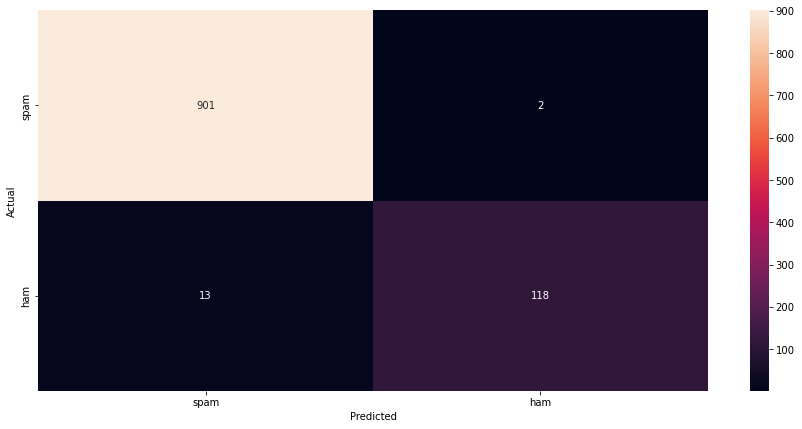

In [11]:
#  visualize confusion matrix

labels = ['spam', 'ham']

conf_mat = confusion_matrix(y_test, val_predictions)
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
#  save model
filename = '../models/MNB_model.sav'
pickle.dump(best_model, open(filename, 'wb'))